In [4]:
pip install numpy pandas matplotlib seaborn scikit-learn hdbscan


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\Users\VE00YM679\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\VE00YM679\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


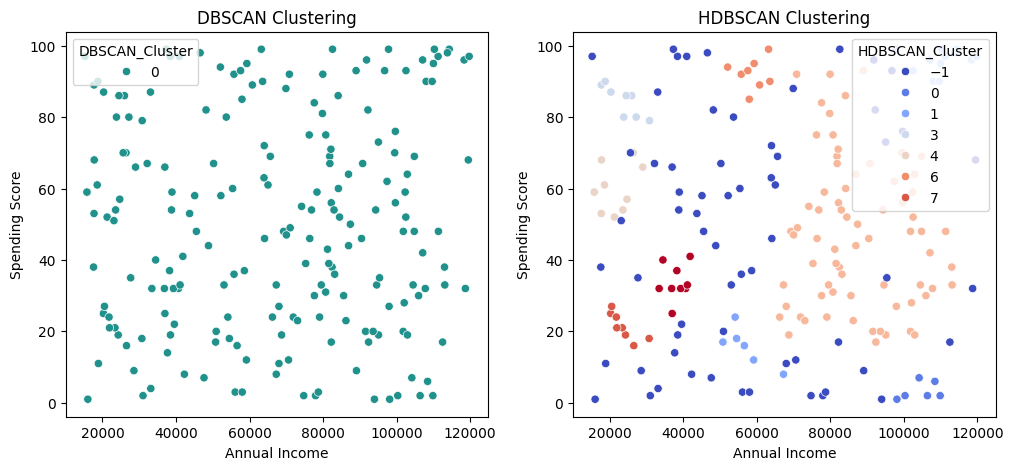

DBSCAN_Cluster
0    200
Name: count, dtype: int64
HDBSCAN_Cluster
 5    70
-1    63
 2    12
 4    10
 8     9
 3     8
 7     8
 6     8
 1     6
 0     6
Name: count, dtype: int64


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import hdbscan

# 📌 Generate Sample Customer Data (Annual Income vs Spending Score)
np.random.seed(42)
customers = pd.DataFrame({
    'Annual_Income': np.random.randint(15000, 120000, 200),
    'Spending_Score': np.random.randint(1, 100, 200)
})

# 🔹 Standardize Data for Better Clustering
scaler = StandardScaler()
customers_scaled = scaler.fit_transform(customers)

# ✅ Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
customers['DBSCAN_Cluster'] = dbscan.fit_predict(customers_scaled)

# ✅ Apply HDBSCAN Clustering
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5)
customers['HDBSCAN_Cluster'] = hdbscan_model.fit_predict(customers_scaled)

# 🎨 Plot Results (DBSCAN)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=customers['Annual_Income'], y=customers['Spending_Score'], hue=customers['DBSCAN_Cluster'], palette='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

# 🎨 Plot Results (HDBSCAN)
plt.subplot(1, 2, 2)
sns.scatterplot(x=customers['Annual_Income'], y=customers['Spending_Score'], hue=customers['HDBSCAN_Cluster'], palette='coolwarm')
plt.title("HDBSCAN Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.show()

# 📝 Print Cluster Counts
print(customers['DBSCAN_Cluster'].value_counts())
print(customers['HDBSCAN_Cluster'].value_counts())
